In [63]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [64]:
annual = pd.read_csv('annual_gold_rate.csv')
daily = pd.read_csv('daily_gold_rate.csv')
currency = ['USD','EUR','GBP', 'INR', 'AED', 'CNY']
currencypct = ['USD_pct','EUR_pct','GBP_pct', 'INR_pct', 'AED_pct', 'CNY_pct']

In [65]:
annual.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1978,193.44,124.73580,100.65449,NaN,NaN,NaN
1,1979,304.68,185.06142,143.09014,2481.90512,1163.93597,NaN
2,1980,614.50,378.19461,263.80259,4831.74943,2278.36795,NaN
3,1981,459.26,360.90588,227.01948,3966.64790,1691.03194,NaN
4,1982,375.30,345.59742,215.53232,3553.62680,1378.72895,NaN


In [66]:
daily.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1985-01-01,308.30,402.45,266.01,3825.85,1134.42,NaN
1,1985-01-02,305.50,401.49,266.00,3787.05,1134.42,NaN
2,1985-01-03,302.30,397.08,262.76,3718.88,1107.67,NaN
3,1985-01-04,303.15,397.15,262.58,3759.64,1118.21,NaN
4,1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.8


In [67]:
annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    44 non-null     int64  
 1   USD     44 non-null     float64
 2   EUR     44 non-null     float64
 3   GBP     44 non-null     float64
 4   INR     43 non-null     float64
 5   AED     43 non-null     float64
 6   CNY     37 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.5 KB


In [125]:
daily

,Date,USD,EUR,GBP,INR,AED,CNY
0,1985-01-01,308.30,402.45,266.01,3825.85,1134.42,0.00
1,1985-01-02,305.50,401.49,266.00,3787.05,1134.42,0.00
2,1985-01-03,302.30,397.08,262.76,3718.88,1107.67,0.00
3,1985-01-04,303.15,397.15,262.58,3759.64,1118.21,0.00
4,1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.80
...,...,...,...,...,...,...,...
9709,2022-03-21,1935.05,1751.26,1465.45,147315.36,7107.54,12306.53
9710,2022-03-22,1915.25,1737.66,1444.44,145908.53,7034.81,12181.47
9711,2022-03-23,1931.75,1755.90,1462.12,147397.35,7095.41,12313.55
9712,2022-03-24,1965.20,1785.33,1490.59,150084.78,7218.28,12517.05


In [69]:
annual = annual.fillna(0)
daily = daily.fillna(0)

In [70]:
daily['Date'] = pd.to_datetime(daily['Date'])

In [71]:
annual.describe()

,Date,USD,EUR,GBP,INR,AED,CNY
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,1999.500000,692.055909,571.891313,450.575615,33253.117656,2527.018449,4163.333618
std,12.845233,486.226172,395.398741,357.907845,37391.513640,1805.300331,3592.354190
min,1978.000000,193.440000,124.735800,100.654490,0.000000,0.000000,0.000000
25%,1988.750000,360.540000,302.387860,215.853185,6121.383235,1324.054458,1651.230198
50%,1999.500000,416.415000,359.622620,249.850690,12660.300050,1530.159455,2876.835330
75%,2010.250000,1176.175000,932.098448,761.273783,60353.236650,4320.047947,7414.661810
max,2021.000000,1798.610000,1549.044710,1378.980990,132967.875100,6606.550460,12205.481970


In [72]:
daily.describe()

,USD,EUR,GBP,INR,AED,CNY
count,9714.000000,9714.000000,9714.000000,9714.000000,9714.000000,9714.000000
mean,756.117006,625.441514,500.862103,39552.116958,2777.031055,4993.277354
std,510.826310,415.971087,375.932133,38595.686908,1876.433314,3386.025009
min,252.800000,222.200000,157.150000,3687.170000,928.530000,0.000000
25%,354.000000,305.272500,219.602500,11601.020000,1298.662500,2189.317500
50%,425.750000,362.995000,259.565000,17068.540000,1563.645000,3312.385000
75%,1235.987500,1017.935000,824.057500,76038.925000,4539.797500,8100.617500
max,2067.150000,1874.560000,1572.810000,156815.690000,7592.950000,14355.530000


In [73]:
annualpct = annual.set_index('Date').fillna(0)
annualpct.head()

,USD,EUR,GBP,INR,AED,CNY
Date,,,,,,
1978,193.44,124.73580,100.65449,0.00000,0.00000,0.0
1979,304.68,185.06142,143.09014,2481.90512,1163.93597,0.0
1980,614.50,378.19461,263.80259,4831.74943,2278.36795,0.0
1981,459.26,360.90588,227.01948,3966.64790,1691.03194,0.0
1982,375.30,345.59742,215.53232,3553.62680,1378.72895,0.0


In [74]:
annualpct = annualpct.pct_change()
annualpct.head()

,USD,EUR,GBP,INR,AED,CNY
Date,,,,,,
1978,NaN,NaN,NaN,NaN,NaN,NaN
1979,0.575062,0.483627,0.421597,inf,inf,NaN
1980,1.016870,1.043617,0.843611,0.946791,0.957468,NaN
1981,-0.252628,-0.045714,-0.139434,-0.179045,-0.257788,NaN
1982,-0.182816,-0.042417,-0.050600,-0.104123,-0.184682,NaN


In [75]:
annualpct = annualpct.reset_index()

In [76]:
annualpct = annualpct.rename({"USD":"USD_pct","EUR":"EUR_pct","GBP":"GBP_pct","INR":"INR_pct","AED":"AED_pct","CNY":"CNY_pct"}, axis='columns')

In [77]:
annualpct.head()

,Date,USD_pct,EUR_pct,GBP_pct,INR_pct,AED_pct,CNY_pct
0,1978,NaN,NaN,NaN,NaN,NaN,NaN
1,1979,0.575062,0.483627,0.421597,inf,inf,NaN
2,1980,1.016870,1.043617,0.843611,0.946791,0.957468,NaN
3,1981,-0.252628,-0.045714,-0.139434,-0.179045,-0.257788,NaN
4,1982,-0.182816,-0.042417,-0.050600,-0.104123,-0.184682,NaN


In [78]:
dailypct = daily.set_index('Date').fillna(0)

In [79]:
dailypct = dailypct.pct_change()
dailypct.head()

,USD,EUR,GBP,INR,AED,CNY
Date,,,,,,
1985-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1985-01-02,-0.009082,-0.002385,-0.000038,-0.010142,0.000000,NaN
1985-01-03,-0.010475,-0.010984,-0.012180,-0.018001,-0.023580,NaN
1985-01-04,0.002812,0.000176,-0.000685,0.010960,0.009515,NaN
1985-01-07,-0.016164,-0.011583,-0.005370,-0.004897,-0.023815,inf


In [80]:
dailypct = dailypct.reset_index()

In [81]:
dailypct = dailypct.rename({"USD":"USD_pct","EUR":"EUR_pct","GBP":"GBP_pct","INR":"INR_pct","AED":"AED_pct","CNY":"CNY_pct"}, axis='columns')

In [82]:
dailypct['Date'] = pd.to_datetime(dailypct['Date'])

In [83]:
dailypct.head()

,Date,USD_pct,EUR_pct,GBP_pct,INR_pct,AED_pct,CNY_pct
0,1985-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,1985-01-02,-0.009082,-0.002385,-0.000038,-0.010142,0.000000,NaN
2,1985-01-03,-0.010475,-0.010984,-0.012180,-0.018001,-0.023580,NaN
3,1985-01-04,0.002812,0.000176,-0.000685,0.010960,0.009515,NaN
4,1985-01-07,-0.016164,-0.011583,-0.005370,-0.004897,-0.023815,inf


#############################################################################

#############################################################################

#############################################################################

In [84]:
#plt.style.use('seaborn-darkgrid')
#palette = plt.get_cmap('Set1')

#num=0 
#for column in annual.drop('Date', axis=1):
#    num+=1

#    plt.subplot(15,90,num)
    
#    plt.plot(annual['Date'], annual[column], marker='', color=palette(num), linewidth=1.0, \
#           alpha=0.9, label=column)
    
#    plt.xlim(1975,2021)
#    plt.ylim(0,2000)
    
#    if num in range(7):
#        plt.tick_params(labelbottom='off')
#    if num not in [1,4,7]:
#        plt.tick_params(labelleft='off')
        
#    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

#plt.suptitle("Gold rate changes throughou the years", \
#                 fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
#plt.text(0.5, 0.02, 'Time', ha='center', va='center')
#plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

#plt.show()

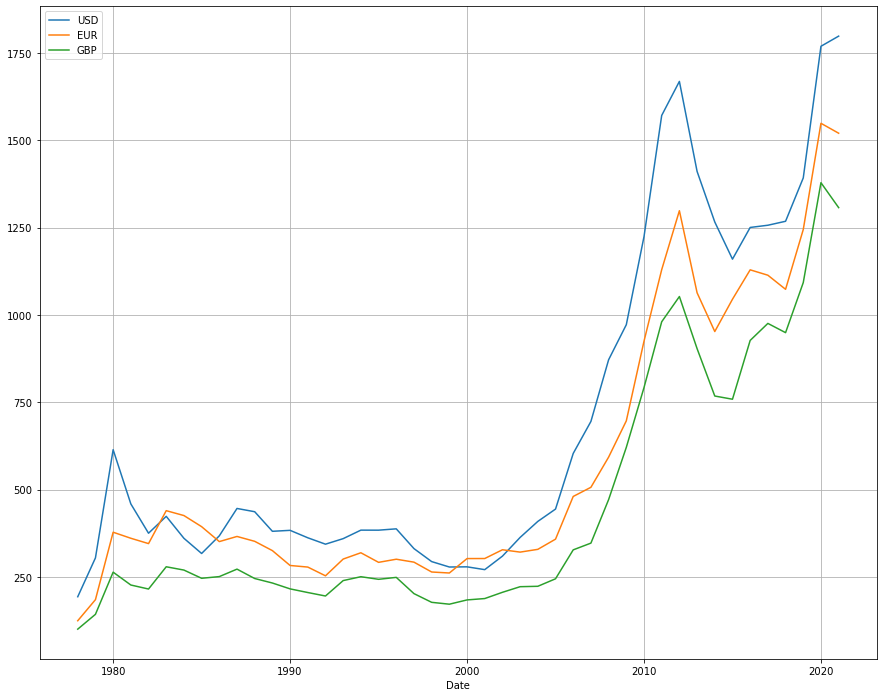

In [85]:
annual.plot(x="Date", y=['USD', 'EUR', 'GBP'], figsize=(15,12), grid=True)
plt.show()

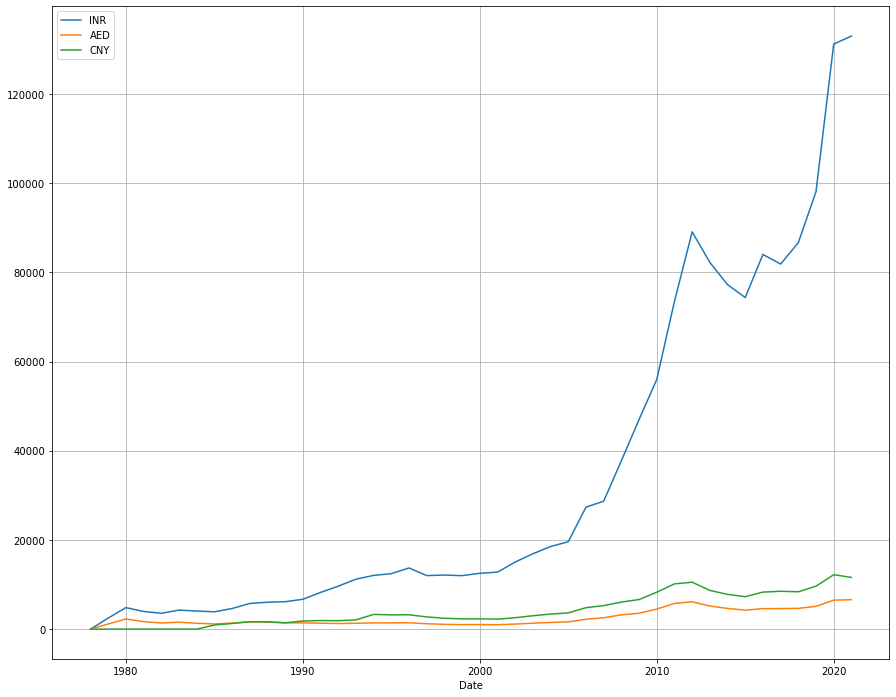

In [86]:
annual.plot(x="Date", y=['INR', 'AED', 'CNY'], figsize=(15,12), grid=True)
plt.show()

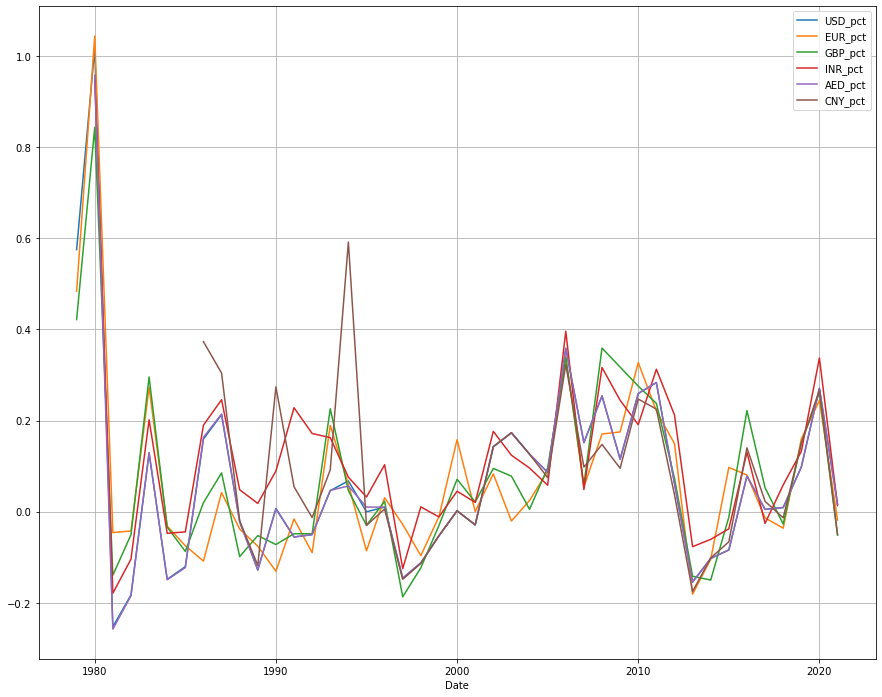

In [87]:
annualpct.plot(x="Date", y=['USD_pct', 'EUR_pct', 'GBP_pct','INR_pct', 'AED_pct', 'CNY_pct'], figsize=(15,12), grid=True)
plt.show()

In [88]:
fig = go.Figure([go.Scatter(x=dailypct['Date'], y=dailypct['USD_pct'])])
fig.show()

#############################################################################

#############################################################################

#############################################################################

In [89]:
for i in currency:
    fig = px.line(annual, x='Date', y=i)
    fig.show()

In [90]:
for i in currencypct:
    fig = px.bar(annualpct, x="Date", y=i)
    fig.show()

Black Monday

In [92]:
blackmonday = daily.loc[(daily['Date'] > '1987-10-1') & (daily['Date'] < '1987-10-30')]

In [93]:
blackmonday

,Date,USD,EUR,GBP,INR,AED,CNY
718,1987-10-02,454.35,380.19,280.20,6011.57,1696.69,1752.19
719,1987-10-05,456.50,382.09,281.10,5903.02,1676.18,1702.26
720,1987-10-06,458.00,381.94,280.64,5964.66,1684.33,1699.48
721,1987-10-07,458.05,380.08,279.13,5976.41,1683.24,1690.16
722,1987-10-08,458.15,379.41,278.93,5959.48,1681.60,1688.99
723,1987-10-09,462.05,381.27,279.86,5879.62,1669.66,1666.35
724,1987-10-12,461.75,380.66,279.26,5976.08,1695.50,1713.49
725,1987-10-13,459.20,379.94,278.81,5996.57,1684.84,1710.94
726,1987-10-14,460.80,379.32,278.68,5980.28,1692.01,1709.96
727,1987-10-15,466.60,381.73,280.32,6061.07,1722.88,1720.04


In [94]:
blackmondaypct = dailypct.loc[(daily['Date'] > '1987-10-1') & (daily['Date'] < '1987-10-30')]

In [95]:
blackmondaypct

,Date,USD_pct,EUR_pct,GBP_pct,INR_pct,AED_pct,CNY_pct
718,1987-10-02,-0.001209,-0.003956,-0.003981,0.006476,0.011711,0.012353
719,1987-10-05,0.004732,0.004998,0.003212,-0.018057,-0.012088,-0.028496
720,1987-10-06,0.003286,-0.000393,-0.001636,0.010442,0.004862,-0.001633
721,1987-10-07,0.000109,-0.004870,-0.005381,0.001970,-0.000647,-0.005484
722,1987-10-08,0.000218,-0.001763,-0.000717,-0.002833,-0.000974,-0.000692
723,1987-10-09,0.008512,0.004902,0.003334,-0.013400,-0.007100,-0.013404
724,1987-10-12,-0.000649,-0.001600,-0.002144,0.016406,0.015476,0.028289
725,1987-10-13,-0.005522,-0.001891,-0.001611,0.003429,-0.006287,-0.001488
726,1987-10-14,0.003484,-0.001632,-0.000466,-0.002717,0.004256,-0.000573
727,1987-10-15,0.012587,0.006353,0.005885,0.013509,0.018245,0.005895


In [96]:
fig = px.line(blackmonday, x='Date', y="USD")
fig.show()

In [97]:
fig = px.line(blackmondaypct, x='Date', y="USD_pct")
fig.show()

On Oct 19th, 1987, when black monday occurred, the price of gold rose ~34% to $481.00. 
The average for the month was around $460. We see from the graphs that in this particular economic crisis, the rate of gold was the inverse of the stock market.

In [98]:
##################################################################################################################
#Early 1990s Recession

In [99]:
early90 = daily.loc[(daily['Date'] > '1989-12-31') & (daily['Date'] < '1993-12-31')]

In [107]:
early90pct = dailypct.loc[(daily['Date'] > '1989-12-31') & (daily['Date'] < '1993-12-31')]

In [101]:
fig = px.line(early90, x='Date', y="USD")
fig.show()

In [109]:
fig = px.line(early90pct, x='Date', y="USD_pct")
fig.show()

In [ ]:
#Unique case where gold price went down 

In [103]:
blackwed = daily.loc[(daily['Date'] > '1992-09-1') & (daily['Date'] < '1992-09-30')]

In [104]:
blackwedpct = dailypct.loc[(daily['Date'] > '1992-09-1') & (daily['Date'] < '1992-09-30')]

In [114]:
fig = px.line(blackwed, x='Date', y="EUR")
fig.show()

In [110]:
fig = px.line(blackwedpct, x='Date', y="EUR_pct")
fig.show()

In [ ]:
#Usual trend of gold price going up on Black Wednesday (Sept 16th)

In [116]:
early20 = daily.loc[(daily['Date'] > '1999-12-31') & (daily['Date'] < '2001-12-31')]

In [117]:
early20pct = dailypct.loc[(daily['Date'] > '1999-12-31') & (daily['Date'] < '2001-12-31')]

In [118]:
fig = px.line(early20, x='Date', y="USD")
fig.show()

In [119]:
fig = px.line(early20pct, x='Date', y="USD_pct")
fig.show()

In [ ]:
#Upwards trends from early 2001s to late 2001s.

In [121]:
greatrec = daily.loc[(daily['Date'] > '2006-12-31') & (daily['Date'] < '2009-12-31')]

In [120]:
greatrecpct = dailypct.loc[(daily['Date'] > '2006-12-31') & (daily['Date'] < '2009-12-31')]

In [122]:
fig = px.line(greatrec, x='Date', y="USD")
fig.show()

In [123]:
fig = px.line(greatrecpct, x='Date', y="USD_pct")
fig.show()

In [124]:
###############################

In [126]:
covid = daily.loc[(daily['Date'] > '2020-1-31') & (daily['Date'] < '2022-03-25')]

In [127]:
covidpct = dailypct.loc[(daily['Date'] > '2020-1-31') & (daily['Date'] < '2022-03-25')]

In [128]:
fig = px.line(covid, x='Date', y="USD")
fig.show()

In [129]:
fig = px.line(covidpct, x='Date', y="USD_pct")
fig.show()

In [ ]:
#Notable dates: March 9 2020 ( Black Monday)
#Delta (May 6 21), Omicron (Nov 9 21)

In [130]:
rusukr = daily.loc[(daily['Date'] > '2022-1-31') & (daily['Date'] < '2022-03-25')]

In [134]:
rusukrpct = dailypct.loc[(daily['Date'] > '2022-1-31') & (daily['Date'] < '2022-03-25')]

In [132]:
fig = px.line(rusukr, x='Date', y="USD")
fig.show()

In [135]:
fig = px.line(rusukrpct, x='Date', y="USD_pct")
fig.show()

In [ ]:
#Important dates
#Feb 24:Russia invades Ukr from three fronts